In [1]:
import sys
sys.path.insert(1, '../')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

from agingml import temporal_degradation_test as tdt

/Users/santiago/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
n_simulations = 1000
n_prod = 12
dataset = 'avocados'
freq='W'
models =['LGBMRegressor', 'ElasticNet', 'RandomForestRegressor', 'MLPRegressor']

There are 884 out of 1000


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_46351/3039570041.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 842 out of 1000


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_46351/3039570041.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 860 out of 1000


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_46351/3039570041.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 625 out of 1000


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_46351/3039570041.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


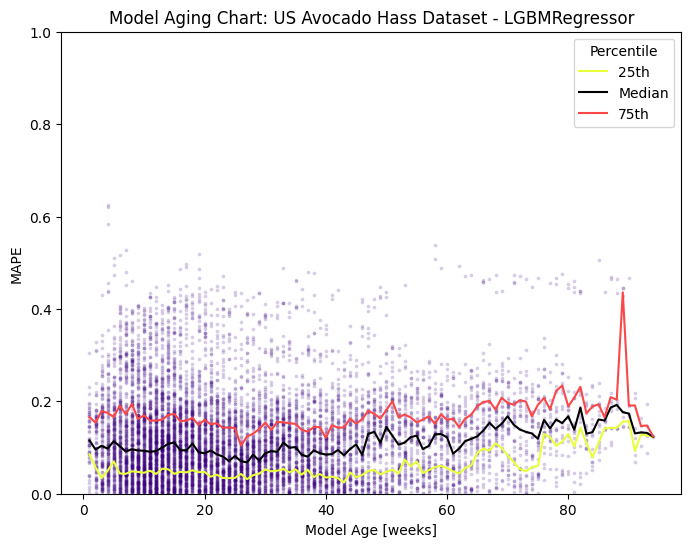

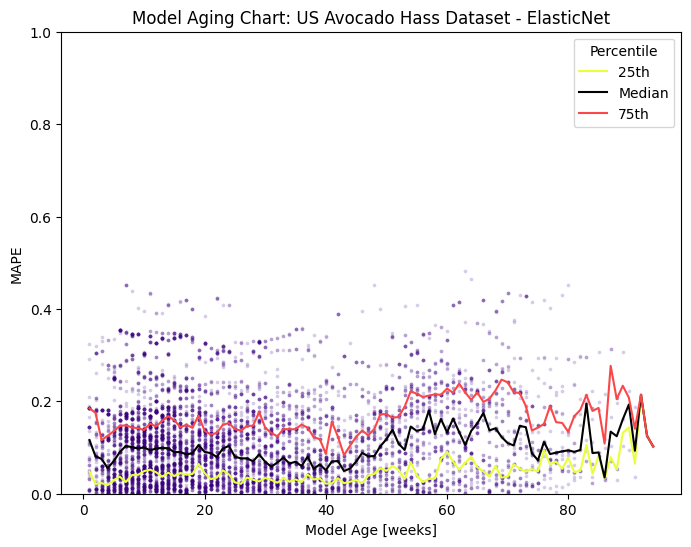

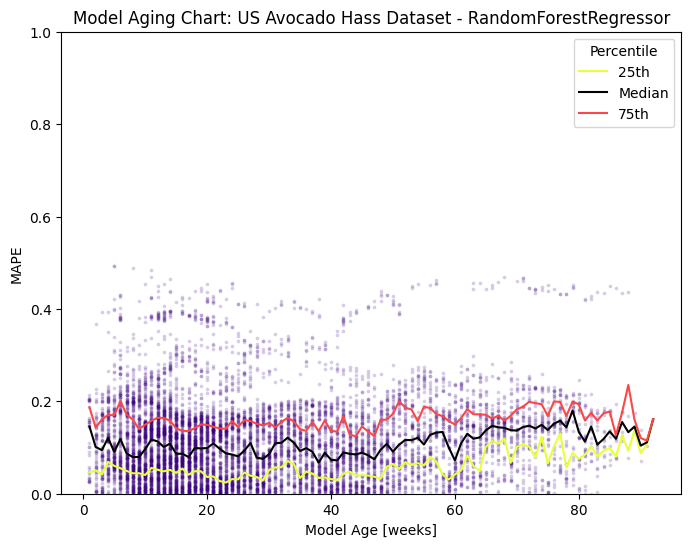

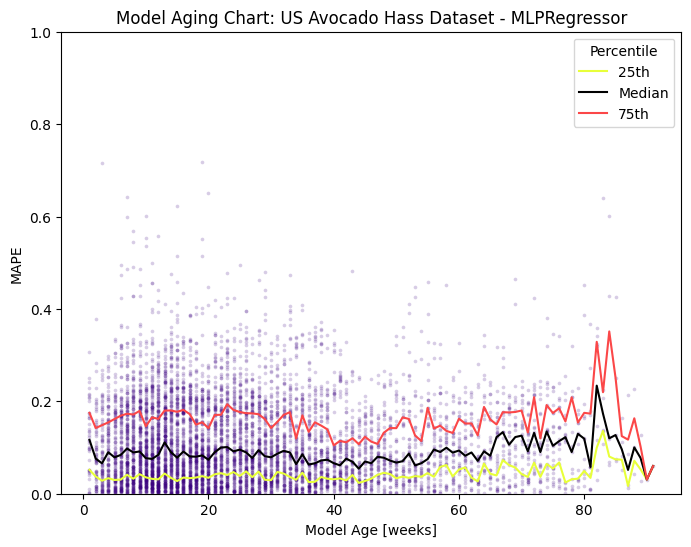

In [7]:
for model in models:
    errors_df = pd.read_parquet(f'../results/aging/{dataset}/aging_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod.parquet')
    d_errors_df = pd.read_parquet(f'../results/aging/{dataset}/aging_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod_{freq}.parquet')

    test_errors_df = errors_df[errors_df['partition'] == 'test']
    test_mape = test_errors_df.groupby('simulation_id').apply(lambda group: mean_absolute_percentage_error(group.y, group.y_pred))
    test_mape = pd.DataFrame(test_mape, columns=['test_mape']).reset_index()

    d_errors_df = pd.merge(d_errors_df, test_mape, how='left', on='simulation_id')
    d_errors_df = d_errors_df[d_errors_df['test_mape'] <= 0.1]

    valid_models = len(d_errors_df['simulation_id'].drop_duplicates())
    print(f'There are {valid_models} out of {n_simulations}')

    fig = tdt.plot_aging_chart(d_errors_df, metric='MAPE', freq='weeks', plot_name=f"Model Aging Chart: US Avocado Hass Dataset - {model}")
    fig.show()
    fig.savefig(f'../figures/aging_plot_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod.svg', format='svg')